# Plot Dot Plot

## This notebook will help you generate "Prism-style" plots in Python.

## Setup
First, we need to update our numpy installation. Run the cell below, and then restart the kernel.

In [ ]:
!pip install numpy=='1.22.0'

Now, we can import the packages we need, and show what we've imported.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
%whos

Variable   Type      Data/Info
------------------------------
pd         module    <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns        module    <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>


## Import Data

In [26]:
# Option 1: Import a CSV file as a Pandas dataframe
#filename = ...
#data = pd.read_csv(filename)

# Option 2: Import your data as two lists and generate a dataframe from it

data_1 = [1,3,3,2,1,2,4,2,5]
data_2 = [3,4,5,3,2,6,7,8,3]
data = pd.DataFrame(data={'Condition_1':data_1,'Condition_2':data_2})
data

,Condition_1,Condition_2
0,1,3
1,3,4
2,3,5
3,2,3
4,1,2
5,2,6
6,4,7
7,2,8
8,5,3


## Plot Data
Below, we'll use a seaborn plotting function called [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) to plot each of our data points.

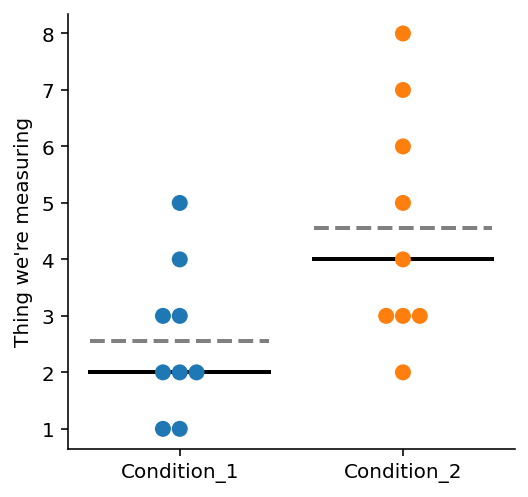

In [34]:
# Set up the plot
fig,ax = plt.subplots(1,1,figsize=(4,4))

# plot the mean line
sns.boxplot(data=data, showmeans=True,meanline=True,
            meanprops={'color': 'gray', 'ls': '--', 'lw': 2},
            medianprops={'visible': True,'color': 'black', 'ls': '-', 'lw': 2},
            whiskerprops={'visible': False},
            showfliers=False,showbox=False,showcaps=False)

# plot individual data points
sns.swarmplot(data=data,s=8)

plt.ylabel('Thing we\'re measuring')

# Make the axes look nice!
ax.spines[['right', 'top']].set_visible(False)

plt.show()

## Check to see how skewed the data is

Before we run any hypoothesis tests, we need to know if our data is skewed or not. To test for skewness, we can use [`stats.skewtest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html#scipy.stats.skewtest) to test. This method implements the <a href="https://www.jstor.org/stable/2684359?seq=1">D'Agostino-Pearson skewness test</a>, one of many different tests (e.g., the Kolmogorov-Smirov test) that can be used to check the normality of a distribution. **If the skew test gives us a p-value of less than 0.05, the population is skewed.**

The skewtest p-value is 0.173311669037047977326437830925


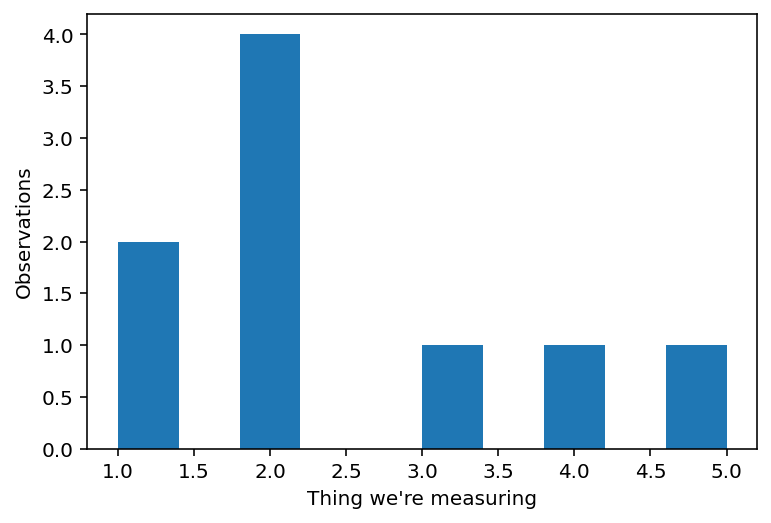

In [8]:
from scipy import stats

sample = data['Condition_1'] # Choose which data to use

stat,pvalue = stats.skewtest(sample) # Run the skew test

# Print the p value of the skew test up to 30 decimal points
print('The skewtest p-value is ' + '%.30f' % pvalue) 

plt.hist(sample) # Create a histogram
plt.ylabel('Observations')
plt.xlabel('Thing we\'re measuring')
plt.show()

## Run two-sample statistics

### *Inferential statistics* generalize from observed data to the world at large

Most often, the goal of our hypothesis testing is to test whether or not two distributions are different, or if a distribution has a different mean than the underlying population distribution.

The SciPy stats package has [many hypothesis testing tools](https://docs.scipy.org/doc/scipy/reference/stats.html) (see Statistical Tests). In most cases, we will be testing whether two or more distributions are different from eachother.

If we know our distributions are normal (they're generated from a normal distribution!) we could use **parametric statistics** to test our hypothesis. To test for differences between normal populations, we can use the independent t-test in our stats package: `stats.ttest_ind()`. If we had paired samples, we would use a dependent t-test [as seen here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel).

If one of our populations is skewed, however, we **cannot use a t-test**. A t-test assumes that the populations are normally distributed. For skewed populations, we can use either the [Mann-Whitney U](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu) (for independent samples, `stats.mannwhitneyu()`) or the [Wilcoxon Signed Rank Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon) (for dependent/paired samples,`stats.wilcoxon()`).

Below, there is sample code to run three different statistical tests. You should use the one that is most appropriate for your data. 

In [9]:
print(stats.ttest_ind(data['Condition_1'],data['Condition_2'])) # to run an independent t-test
print(stats.mannwhitneyu(data['Condition_1'],data['Condition_2'])) # to run a mannwhitneyu
print(stats.wilcoxon(data['Condition_1'],data['Condition_2'])) # to run a wilcoxon signed rank test

Ttest_indResult(statistic=-2.9988007195203354, pvalue=0.008500738734233602)
MannwhitneyuResult(statistic=12.0, pvalue=0.0060769623290159005)
WilcoxonResult(statistic=0.0, pvalue=0.00390625)
